
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [19]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for plotting
from matplotlib import pyplot as plt # used for plotting
import scipy.stats as stats  # used for statistical functions
import pylab  # used for plotting and mathematical calculations in a combined namespace
import pingouin as pg # used for statistical analysis

df_mh = pd.read_csv('C:/Users/idaid/Desktop/MillerHadenData.csv')


In [20]:
# Q1a (code):
# Display first few rows of the dataframe
print(df_mh.head())

# Check data types and information
print(df_mh.info())


   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB
None


In [21]:
# Q1b (code):
# Check for missing values
print(df_mh.isnull().sum())

# Check whether there is a data point for each participant on both variables
missing_abil = df_mh['Abil'].isnull().sum()
missing_iq = df_mh['IQ'].isnull().sum()

print(f"Missing data points in 'Abil': {missing_abil}")
print(f"Missing data points in 'IQ': {missing_iq}")

# By checking, each participant has data points on both variables

Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64
Missing data points in 'Abil': 0
Missing data points in 'IQ': 0


In [22]:
# Q1c (code):
# Check data distribution
normality_abil = pg.normality(df_mh['Abil'])
normality_iq = pg.normality(df_mh['IQ'])

normality_abil, normality_iq


(             W      pval  normal
 Abil  0.948795  0.235491    True,
            W      pval  normal
 IQ  0.963604  0.490811    True)

### Q1c result explations:

- **Reading Ability (Abil)**: The Shapiro-Wilk normality test gave a statistic of 0.949 and a p-value of 0.235. Since the p-value is greater than 0.05, we do not have enough evidence to reject the normality assumption and can therefore consider the data to be approximately normally distributed.

- **Intelligence (IQ)**: The Shapiro-Wilk test statistic is 0.964 and the p-value is 0.491. Again, this higher p-value indicates that we do not have enough evidence to reject the normality assumption, i.e. the data can be considered normally distributed.

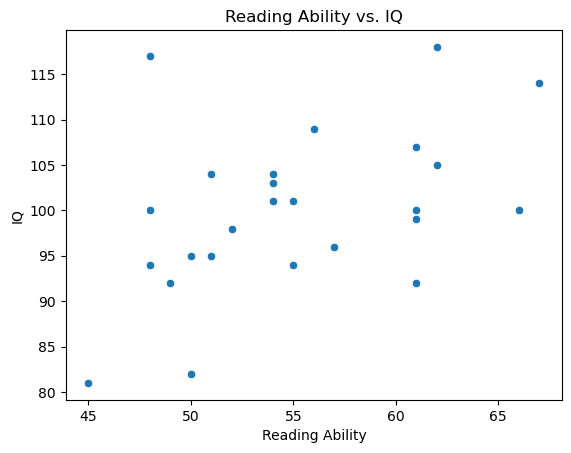

In [23]:
# Q1d (code):
# Scatter plot

# Use seaborn to draw scatter plots
sns.scatterplot(data=df_mh, x='Abil', y='IQ')
plt.title('Reading Ability vs. IQ') # Set the chart title
plt.xlabel('Reading Ability') # Set x-axis label
plt.ylabel('IQ') # Set the y-axis label
plt.show() # Display chart


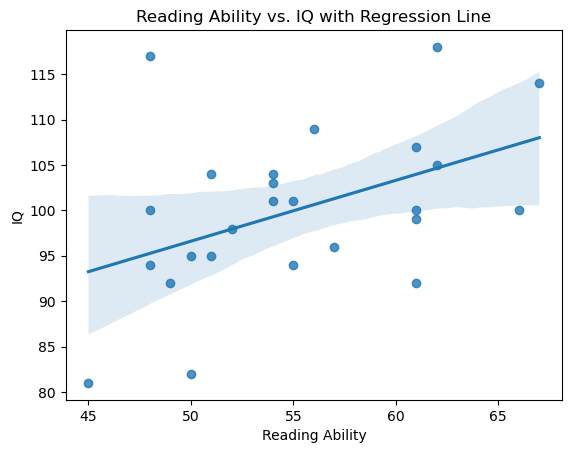

In [24]:
# Q1e (code):
# Correlation line

# Use seaborn to draw scatter plots and best-fit lines
sns.regplot(data=df_mh, x='Abil', y='IQ')
plt.title('Reading Ability vs. IQ with Regression Line') # Set the chart title
plt.xlabel('Reading Ability') # Set x-axis label
plt.ylabel('IQ') # Set the y-axis label
plt.show() # Display chart

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

### Q2a (answer with words):

Based on the results of question 1:

We checked the normal distribution of reading ability (Abil) and intelligence (IQ) and the results showed that the distribution of these two variables is close to normal distribution. 
And there is no indication that the relationship between these two variables is non-linear.
We have reason to believe that the relationship between these two variables may be linear and that the data satisfy the assumption of normal distribution.
Therefore, the Pearson correlation coefficient test is appropriate in this case. 

In [25]:
# Q2b (code):
corr_pearson = pg.corr(df_mh['Abil'], df_mh['IQ'])
print(corr_pearson)

          n        r         CI95%     p-val   BF10     power
pearson  25  0.45117  [0.07, 0.72]  0.023593  2.804  0.640299


### Q2c (answer with words):

Based on the results, we can interpret the relationship between reading ability (`Abil`) and intelligence (`IQ`) as follows:

- **Correlation coefficient (r)**: 0.45117. This value indicates a moderate positive correlation between reading ability and intelligence. 

That is, as reading skills improve, intelligence scores tend to improve, and vice versa.

- **P-value (p-val)**: 0.023593. The P value is less than 0.05,

which indicates that we have enough evidence to reject the null hypothesis (the null hypothesis is that there is no correlation between reading ability and intelligence). 

Therefore, we can consider the positive correlation between reading ability and intelligence to be statistically significant.

In summary, there is a moderate positive correlation between reading ability and intelligence, and this correlation is statistically significant.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

### Q3a (answer in words):

H0 (Null Hypothesis): There is no association between reading ability (High/Low) and reading time frequency (Frequent/Infrequent); the variables are independent.

H1 (Alternative Hypothesis): There is an association between reading ability and reading time frequency; the variables are not independent.

In [26]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for ....
from scipy.stats import chi2_contingency ##used for ....

# Define the rounded average for Reading Ability and Home
average_abil = df_mh['Abil'].mean()
average_home = df_mh['Home'].mean()

# Create the Rank_Abil column
df_mh['Rank_Abil'] = df_mh['Abil'].apply(lambda x: 'High' if x > average_abil else 'Low')

# Create the Rank_Home column
df_mh['Rank_Home'] = df_mh['Home'].apply(lambda x: 'Frequent' if x > average_home else 'Infrequent')


In [27]:
# Q3c (code):
# Construct Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])
contingency_matrix

Rank_Home,Frequent,Infrequent
Rank_Abil,,
High,8,2
Low,3,12


In [28]:
# Q3d (code):
# Perform the Chi-square test
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency_matrix)
print(chi2, p_value)
print('These are the expected frequencies')
print(expected)

if p_value < 0.05:
    print("The observed differences are statiscally significant - H0 is rejected")
else:
    print("The observed differences are not statiscally significant - H1 is rejected")

6.500270562770561 0.010785807794066234
These are the expected frequencies
[[4.4 5.6]
 [6.6 8.4]]
The observed differences are statiscally significant - H0 is rejected


### Q3e (answer in words):
The p-value below 0.05 indicates a significant association between Reading Ability and Reading Time Frequency, 
meaning that the distribution of reading time frequency differs significantly between individuals with high and low reading abilities. 

The chi-square statistic indicates the strength of this association, with the result suggesting a moderate association.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [29]:
import pandas as pd # used for data processing and analysis, especially suitable for processing tabular data
from scipy import stats # used for scientific calculations and statistical analysis
import numpy as np # used for numerical calculations, processing arrays and matrix operations
import matplotlib.pyplot as plt # used for data visualization and chart drawing
import seaborn as sns # used for data visualization

# Load the data
df_evaluators = pd.read_csv('C:/users/idaid/Desktop/evaluators.csv')
df_evaluators.head()

,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [30]:
# Q4a (code):
# Calculate mean and standard deviation for age
mean_age = df_evaluators['age'].mean()
std_age = df_evaluators['age'].std()

print(f"Mean Age: {mean_age}")
print(f"Standard Deviation of Age: {std_age}")

Mean Age: 30.852941176470587
Standard Deviation of Age: 6.238358141327351


In [31]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
male_count = df_evaluators[df_evaluators['sex'] == 1].shape[0]
female_count = df_evaluators[df_evaluators['sex'] == 2].shape[0]

print(f"Male Evaluators: {male_count}")
print(f"Female Evaluators: {female_count}")

Male Evaluators: 4
Female Evaluators: 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [32]:
# Load ratings data
df_ratings = pd.read_csv('C:/users/idaid/Desktop/ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [33]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
intellect_ratings = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]


# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean = intellect_ratings.groupby('eval_id')['Rating'].mean().reset_index()


# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([intellect_mean, other_ratings], ignore_index=True)

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = pd.merge(ratings2, df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category'])

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,Rating,condition
40,1,hire,6.000000,listened
39,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
42,2,hire,4.000000,listened
41,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



### Q6a (answer in words):
**Null Hypothesis (H0)**: There is no significant difference between overall ratings on the Intellect, Hire, and Impression scales between evaluators who listened to resume pitches and evaluators who read the resume pitches. Formally, for each trait (Intellect, Hire, Impression), we can state the null hypothesis as \( H0: \mu_{listened} = \mu_{read} \), where \( \mu \) represents the mean rating for each group.

 **Alternative Hypothesis (H1)**: There will be a significant difference between overall ratings on the Intellect, Hire, and Impression scales between evaluators who listened to resume pitches and evaluators who read the resume pitches. Formally, for each trait, the alternative hypothesis can be stated as \( H1: \mu_{listened} \neq \mu_{read} \).


We could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

### Q6b (answer in words):
Which t-test should we choose, one-tail or two-tail? Explian why.

We should choose a two-tail t-test for this analysis. The reason is that we are interested in determining if there is any significant difference between the two conditions (listened vs. read), regardless of the direction of the difference. A two-tail t-test allows us to test for the possibility of a significant difference in both directions (i.e., whether the listened group rated significantly higher or lower than the read group).

### Q6c (answer in words):
What are the independent variable and the dependent variable here?

Independent Variable: The independent variable is the condition under which the resume pitches were presented to the evaluators, which has two levels - listened and read. This variable is categorical.

Dependent Variables: The dependent variables are the overall ratings given by the evaluators on the Intellect, Hire, and Impression scales. These ratings are quantitative and continuous, and they are the outcomes we are interested in comparing between the two groups of evaluators.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [34]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for ...

# Descriptive analysis of the ratings
ratings_desc = ratings2.groupby(['Category', 'condition'])['Rating'].agg(['mean', 'std', 'count'])

# Test for normal distribution (Shapiro-Wilk test)
shapiro_results = {}
for category in ['intellect', 'impression', 'hire']:
    listened_ratings = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'listened')]['Rating']
    read_ratings = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'read')]['Rating']
    shapiro_results[category] = {'listened': shapiro(listened_ratings), 'read': shapiro(read_ratings)}


# Test for homogeneity of variances (Levene's test)
levene_results = {}
for category in ['intellect', 'impression', 'hire']:
    listened_ratings = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'listened')]['Rating']
    read_ratings = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'read')]['Rating']
    levene_results[category] = levene(listened_ratings, read_ratings)

# Independent t-tests
ttest_results = {}
for category in ['intellect', 'impression', 'hire']:
    listened_ratings = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'listened')]['Rating']
    read_ratings = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'read')]['Rating']
    ttest_results[category] = ttest_ind(listened_ratings, read_ratings)


ratings_desc, shapiro_results, levene_results, ttest_results

(                          mean       std  count
 Category   condition                           
 hire       listened   4.714286  2.261479     21
            read       2.888889  2.054805     18
 impression listened   5.968254  1.917477     21
            read       4.074074  2.233306     18
 intellect  listened   5.634921  1.608674     21
            read       3.648148  1.911343     18,
 {'intellect': {'listened': ShapiroResult(statistic=0.9350408315658569, pvalue=0.17365092039108276),
   'read': ShapiroResult(statistic=0.9512398838996887, pvalue=0.4447984993457794)},
  'impression': {'listened': ShapiroResult(statistic=0.9394754767417908, pvalue=0.21275967359542847),
   'read': ShapiroResult(statistic=0.9483764171600342, pvalue=0.40011918544769287)},
  'hire': {'listened': ShapiroResult(statistic=0.9390669465065002, pvalue=0.20883114635944366),
   'read': ShapiroResult(statistic=0.9034496545791626, pvalue=0.06600592285394669)}},
 {'intellect': LeveneResult(statistic=0.8980185752566

### Q7b (answer in words):
Based on the analysis results, we can draw the following conclusions:

1. **Descriptive statistics** show that evaluators generally gave higher average ratings (Intelligence, Impression, Recruitment) when listening to resume presentations than when reading resume presentations. This suggests that listening to a resume presentation may leave a more positive impression on the evaluator.

2. The results of **Shapiro-Wilk Normality Test** show that under all conditions (listening and reading) and all categories (intelligence, impression, recruitment), the score distribution roughly conforms to the normal distribution, because all p-values are all greater than 0.05, which means we do not have enough evidence to reject the null hypothesis of normal distribution.

3. The results of **Levene's homogeneity of variance test** show that the scoring variances under the two conditions of listening and reading are homogeneous, because the p values of all categories are greater than 0.05. This satisfies one of the assumptions for conducting an independent samples t-test.

4. The results of the **independent sample t-test** show that for intelligence, impression and recruitment scores, there are significant differences between listening and reading conditions. The p-values are 0.0011, 0.0071 and 0.0127 respectively, which are all lower than the commonly used significant scores. Sex level 0.05. This suggests that the manner in which resume statements are presented (listening vs. reading) has a significant impact on evaluator ratings.

In summary, the manner in which resume statements are presented (listening vs. reading) significantly affects evaluators' perceptions and ratings of a candidate's intelligence, impression, and recruitment likelihood. Specifically, resume statements that were heard tended to receive higher ratings than resume statements that were read, suggesting that presenting information aurally may have a more positive impact on evaluators' evaluations.